In [7]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime

df = pd.read_excel("Client_data.xlsx", sheetname="offshore_Data")

# Process data
# extract birthdate year
df['birthdate'] = pd.to_datetime(df['birthdate'])
birth_yr = df['birthdate'].dt.year

# collect age, gender, address and pair up
data = list()
for i in range(df.shape[0]):
    try:
        age = int(datetime.date.today().year - birth_yr[i])
        gender = df['gendercode'][i]
        address = df['address1_composite'].apply(lambda x : x[:3])[i]
    except:
        continue
    add_gender_age = [address, gender, age]
    data.append(add_gender_age)
# data[[add, gender, age]]

[['台北市', 'M', 53], ['高雄市', 'F', 55], ['新竹市', 'F', 61], ['新北市', 'M', 61], ['TND', 'M', 23], ['高雄市', 'F', 23], ['新北市', 'F', 53], ['ATT', 'M', 23], ['高雄市', 'F', 53], ['NT1', 'F', 64], ['台北市', 'F', 56], ['台北市', 'F', 49], ['新北市', 'M', 67], ['高雄市', 'M', 55], ['KHD', 'M', 23], ['康和投', 'M', 88], ['寶來投', 'M', 85], ['彰化縣', 'F', 61], ['台中市', 'M', 71], ['臺中市', 'F', 57], ['台北市', 'M', 51], ['台北市', 'M', 59], ['台北市', 'M', 50], ['桃園縣', 'M', 59], ['屏東市', 'F', 62], ['高雄市', 'M', 46], ['高雄市', 'M', 43], ['高雄市', 'F', 66], ['高雄市', 'F', 23], ['台北市', 'F', 72], ['TP7', 'F', 23], ['高雄市', 'M', 82], ['臺中市', 'M', 50], ['彰化縣', 'F', 50], ['KHD', 'F', 59], ['桃園縣', 'F', 57], ['台北市', 'M', 69], ['台北市', 'M', 61], ['ILD', 'F', 61], ['台南市', 'F', 70], ['台北市', 'M', 71], ['新竹市', 'M', 55], ['台北市', 'M', 72], ['臺南市', 'F', 51], ['台北市', 'F', 60], ['台北市', 'F', 58], ['台北市', 'F', 48], ['台北市', 'F', 58], ['台北市', 'F', 65], ['桃園市', 'M', 23], ['宜蘭縣', 'M', 59], ['桃園市', 'F', 56], ['高雄市', 'F', 68], ['花蓮市', 'M', 73], ['TP2', 'F', 56], ['新北市', '

In [11]:
def lst_in_dict(dat, cat, subcat):
    adict = {}
    for alist in dat:
        if alist[cat] in adict:
            adict[alist[cat]].append(alist[subcat])
        else:
            adict[alist[cat]] = [alist[subcat]]
    return adict
        
# categorize gender and age based on cities        
add = 0
gen = 1
ag = 2
add_gender = lst_in_dict(data, add, gen)
add_age = lst_in_dict(data, add, ag)

male = []
female = []
for loc in add_gender:
    male_num = add_gender[loc].count('M')
    female_num = add_gender[loc].count('F')
    male.append(male_num)
    female.append(female_num)

# categorize age by groups (ten years a group)
AgeList = []
cnt = 0
for loc in add_age:
    subage= {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 'over':0}
    age_list = add_age[loc]
    for num in age_list:
        teens = num // 10
        if teens in subage:
            subage[teens] += 1
        else:
            subage['over'] += 1
            
    subage_list = list(subage.values())
    cnt += 1
    for i in range(8):
        if cnt ==1:
            AgeList.append([subage_list[i]])
        else:
            AgeList[i].append(subage_list[i])



In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# show Chinese character
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

plt.style.use("ggplot")

def stackedbarplot(x_data, y_data_list, name, colors, y_data_names="", x_label="", y_label="", title=""):
    
    for i in range(0, len(y_data_list)):
        if i == 0:
            plt.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            plt.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.xticks(x_data, name)
    plt.title(title)
    plt.legend(loc = 'upper right')

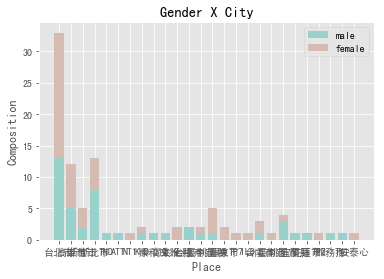

In [13]:
place = list(add_gender.keys())
ind = [x for x, _ in enumerate(place)]
colors_gender = ["#9AD2CB", "#D5BBB1"]
np_male = np.array(male)
np_female = np.array(female)
gender_list = [np_male, np_female]
gender_label = ['male', 'female']

# plot Gender X City
stackedbarplot(ind, gender_list, place, colors_gender, gender_label, x_label = "Place",y_label =  "Composition", title = "Gender X City")

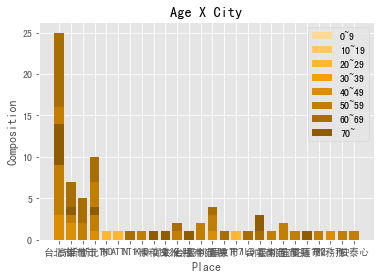

In [14]:
colors_age = ['#FFDA96', '#FFC863', '#FFB630', '#F59F00', '#DB8F00', '#C27E00', '#A86E00',  '#8F5D00']
np_agelist = np.array(AgeList)
age_label = ['0~9', '10~19', '20~29', '30~39', '40~49', '50~59', '60~69', '70~']
stackedbarplot(ind, np_agelist, place, colors_age, age_label, x_label = "Place", y_label = "Composition", title = "Age X City")

In [16]:
def counting(a_data):
    a = {}
    for line in a_data:
        if line not in a:
            a[line] = 0
        a[line] += 1
    return a

address_cluster = df['address1_composite'].apply(lambda x: x[:3])
add_cnt = counting(address_cluster)

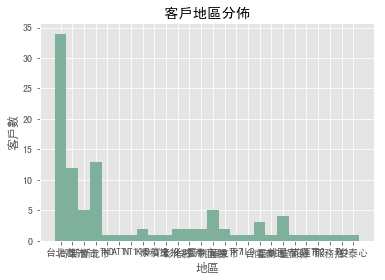

In [19]:
def barplot(x, y,x_label="", y_label="", title=""): 
    
    plt.bar(x,y, width = 1, color="#7EB09B", align = 'center')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

# Onshore
barplot(add_cnt.keys(), add_cnt.values(), x_label = "地區", y_label = "客戶數", title="客戶地區分佈")